<a href="https://colab.research.google.com/github/FabricioCruzDev/AnaliseDeDados/blob/master/EngenhariaDados/RegressaoLinear/desafio_modelo_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de predição

Estimar o retorno de vendas que pode ser gerado apartir de um determinado investimento em publicidade.

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Extract

A empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Esse registro está no arquivo MKT.csv, já baixei e analisei o conteúdo do arquivo.

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df_mkt = pd.read_csv('/content/drive/MyDrive/PosGraduacao/CRISP-DM/Desafio/MKT.csv', sep=',', encoding = 'UTF-8')

In [35]:
df_mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


###Sobre os dados

Colunas:
  - youtube -> Investimento youtube
  - facebook -> Investimento facebook
  - newspaper -> Investimento newspaper
  - sales -> Valor das vendas

####Análise descritiva

In [36]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [37]:
df_mkt.duplicated().sum()

0

In [38]:
round(df_mkt.describe(),2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


<Axes: >

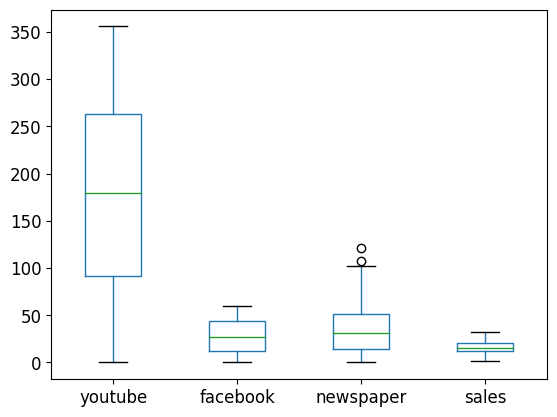

In [39]:
df_mkt.boxplot(fontsize= 12, grid = False)

  - Não há dados nulos
  - Não há linhas duplicadas
  - O desvio padrão está se mantendo abaixo da média
  - Outliers na varável newspaper

In [40]:
df_mkt.query('newspaper > 100')

,youtube,facebook,newspaper,sales
46,20.28,52.44,107.28,10.44
72,355.68,43.56,121.08,28.56
136,281.40,4.08,101.76,14.28


Identifiquei 3 outliers na variável, como não vou conseguir verificar com o setor responsável vou mantê-los. Considerando o negócio e o tipo de propaganda utilizada é os valoes são possíveis.

####Análise Exploratória

In [41]:
df_mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


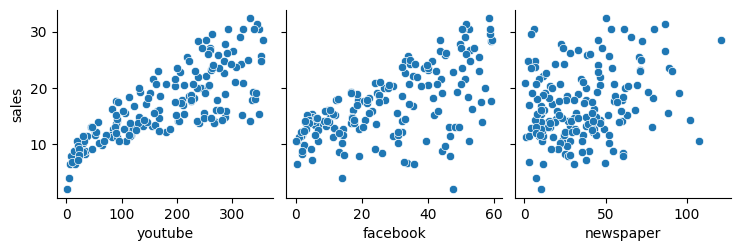

In [42]:
sns.pairplot(df_mkt, x_vars=df_mkt.columns[:-1], y_vars=['sales']);

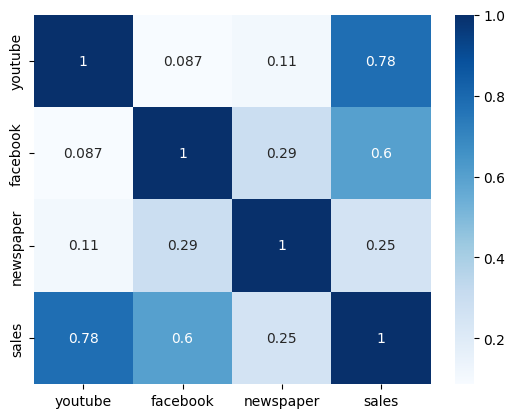

In [43]:
sns.heatmap(df_mkt.corr(), cmap="Blues", annot = True);

###Modeling

####Utilização de recursos da bolitoteca Sciki-learn


---


<https://scikit-learn.org/stable/api/index.html>



Dividindo o data set em dois, onde um vai conter os parâmetros que representam o investimento e o outro formado com dados da varável target (as vendas).

#####Train Teste Split


---

<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split>

In [44]:
X = df_mkt[df_mkt.columns[:-1]]
y = df_mkt[['sales']]

***Separando os dados de traino em teste.***

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 42)

In [46]:
print(X_test.shape[0] == y_test.shape[0])
print(X_train.shape[0] == y_train.shape[0])

True
True


#####Linear Regression

---



***Carregando e treinando o modelo***

In [47]:
model_lr = LinearRegression()

In [48]:
train_model_lr = model_lr.fit(X_train, y_train)

In [49]:
y_pred = train_model_lr.predict(X_test)

#####R^2

---


Coeficiente de determinação, vai representar o quanto o modelo acertou, variando de 0 a 1. Quanto mais próximo de um, melhor é o resultado.

In [50]:
r_score = r2_score(y_test, y_pred)

In [51]:
print("r_quadrado: ", r_score)

r_quadrado:  0.882423505618885


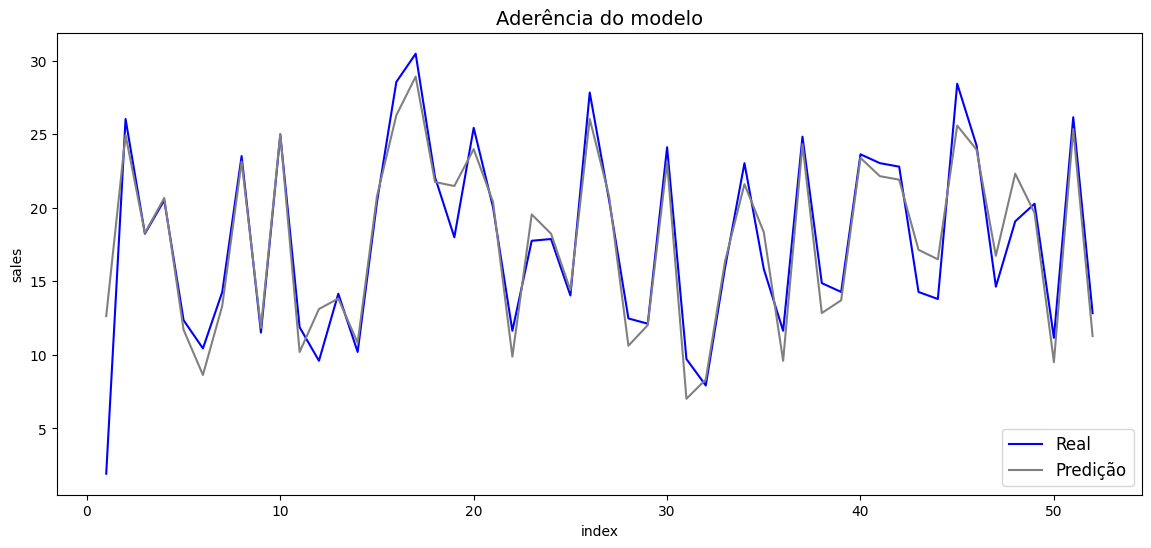

In [52]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(14,6))
plt.plot(c, y_test, color='blue', label='Real')
plt.plot(c, y_pred, color='gray', label= 'Predição')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('index')
plt.ylabel('sales')
plt.title('Aderência do modelo', fontsize = 14)
fig.show()


## Utilizando o modelo

Inserindo dados para simular o modelo.

In [53]:
data = {'youtube': [90.0, 100, 1],
        'facebook':[10, 5, 2],
        'newspaper':[5,10,3]}

df_test = pd.DataFrame(data)

df_test

,youtube,facebook,newspaper
0,90.0,10,5
1,100.0,5,10
2,1.0,2,3


In [54]:
test_pred = train_model_lr.predict(df_test)


#####Resultado


---



In [55]:
test_pred

array([[9.61561336],
       [9.12680838],
       [4.08691915]])